## 3.Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming

In [23]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [24]:
ps = PorterStemmer()

In [25]:
df = pd.read_csv('../Data/clean/clean_and_described_data.csv')

In [26]:
def transformed_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    transformation_text = []
    # Remove Special Characters
    for word in text:
        if word.isalnum():
            transformation_text.append(word)

    text = transformation_text[:]
    transformation_text.clear()
    # Reassign the list and remove stop words and punctuations
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            transformation_text.append(word)

    text = transformation_text[:]
    transformation_text.clear()
    # Reassign the list and convert all the words to stem words
    for word in text:
        transformation_text.append(ps.stem(word))

    return " ".join(transformation_text)

In [27]:
df['transformed_text'] = df['text'].apply(transformed_text)

In [28]:
print(df.head())

   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though  


In [29]:
df.to_csv('../Data/preprocessed/transform_data.csv', index=False)

Onward we will use the text and transformed_text columns.
Now we will create word cloud spam and ham. Which will enlarge the important words of these.

Now we will create the word cloud of ham and spam.

In [30]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Now we will create the word cloud of spam messages.

In [31]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

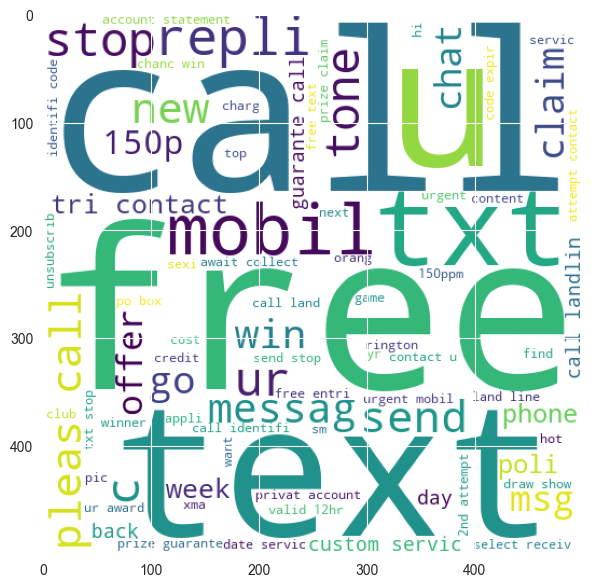

In [32]:
plt.figure(figsize=(10, 7))
plt.imshow(spam_wc)

Same for cloud for ham messages.

In [33]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

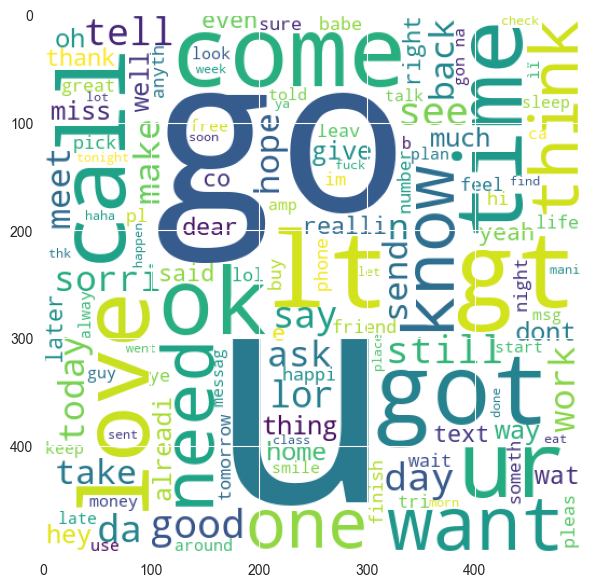

In [34]:
plt.figure(figsize=(10,7))
plt.imshow(ham_wc)

Now we will extract top 30 words which are common in spam.

In [35]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

9939

To count each word we will use the collection module in the spam_corpus.

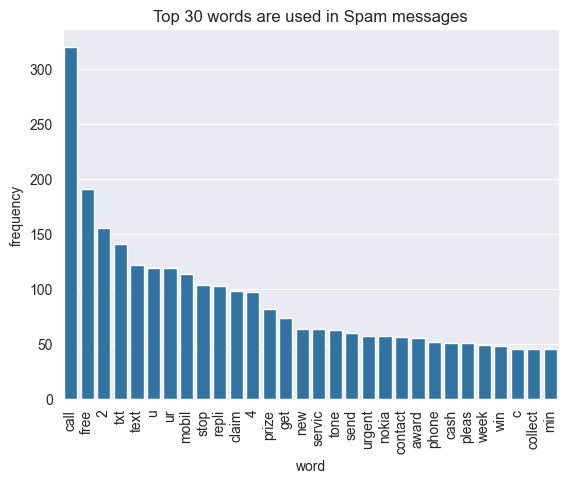

In [37]:
from collections import Counter
spam_top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])
sns.barplot(data=spam_top_words, x='word', y='frequency')
plt.title('Top 30 words are used in Spam messages')
plt.xticks(rotation=90)
plt.show()

In [38]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In ham_corpus.

In [39]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(ham_corpus)

35404

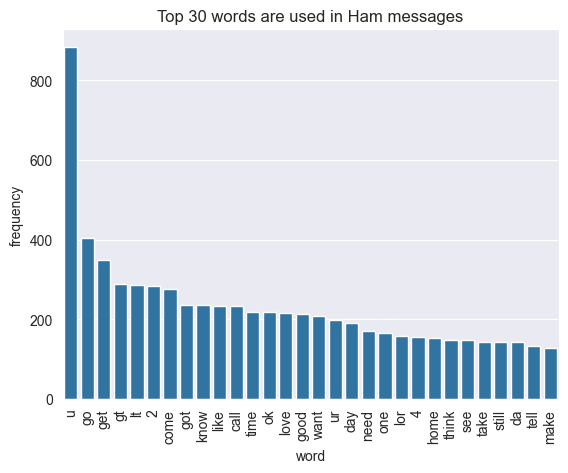

In [41]:
ham_top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])
sns.barplot(data=ham_top_words, x='word', y='frequency')
plt.title('Top 30 words are used in Ham messages')
plt.xticks(rotation=90)
plt.show()

In [42]:
spam_most_used_words = pd.DataFrame(spam_top_words)
spam_most_used_words.to_csv('../Data/preprocessed/top_30_most_used_spam_words.csv', index=False)

In [43]:
ham_most_used_words = pd.DataFrame(ham_top_words)
ham_most_used_words.to_csv('../Data/preprocessed/top_30_most_used_ham_words.csv', index=False)